In [2]:
library("ggplot2")
library("dplyr")
library("repr")
library("reshape2")
library("stats")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
players = read.csv("./fifa23_players_data.csv")
head(players)

Known.As,Full.Name,Overall,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,Age,...,LM.Rating,CM.Rating,RM.Rating,LWB.Rating,CDM.Rating,RWB.Rating,LB.Rating,CB.Rating,RB.Rating,GK.Rating
L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
K. MbappÃ©,Kylian MbappÃ©,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25


In [4]:
colnames(players)

[1] "Known.As"                    "Full.Name"                  
 [3] "Overall"                     "Potential"                  
 [5] "Value.in.Euro."              "Positions.Played"           
 [7] "Best.Position"               "Nationality"                
 [9] "Image.Link"                  "Age"                        
[11] "Height.in.cm."               "Weight.in.kg."              
[13] "TotalStats"                  "BaseStats"                  
[15] "Club.Name"                   "Wage.in.Euro."              
[17] "Release.Clause"              "Club.Position"              
[19] "Contract.Until"              "Club.Jersey.Number"         
[21] "Joined.On"                   "On.Loan"                    
[23] "Preferred.Foot"              "Weak.Foot.Rating"           
[25] "Skill.Moves"                 "International.Reputation"   
[27] "National.Team.Name"          "National.Team.Image.Link"   
[29] "National.Team.Position"      "National.Team.Jersey.Number"
[31] "Attacking.Work.Rate"         "Defensive.Work.Rate"        
[33] "Pace.Total"                  "Shooting.Total"             
[35] "Passing.Total"               "Dribbling.Total"            
[37] "Defending.Total"             "Physicality.Total"          
[39] "Crossing"                    "Finishing"                  
[41] "Heading.Accuracy"            "Short.Passing"              
[43] "Volleys"                     "Dribbling"                  
[45] "Curve"                       "Freekick.Accuracy"          
[47] "LongPassing"                 "BallControl"                
[49] "Acceleration"                "Sprint.Speed"               
[51] "Agility"                     "Reactions"                  
[53] "Balance"                     "Shot.Power"                 
[55] "Jumping"                     "Stamina"                    
[57] "Strength"                    "Long.Shots"                 
[59] "Aggression"                  "Interceptions"              
[61] "Positioning"                 "Vision"                     
[63] "Penalties"                   "Composure"                  
[65] "Marking"                     "Standing.Tackle"            
[67] "Sliding.Tackle"              "Goalkeeper.Diving"          
[69] "Goalkeeper.Handling"         "GoalkeeperKicking"          
[71] "Goalkeeper.Positioning"      "Goalkeeper.Reflexes"        
[73] "ST.Rating"                   "LW.Rating"                  
[75] "LF.Rating"                   "CF.Rating"                  
[77] "RF.Rating"                   "RW.Rating"                  
[79] "CAM.Rating"                  "LM.Rating"                  
[81] "CM.Rating"                   "RM.Rating"                  
[83] "LWB.Rating"                  "CDM.Rating"                 
[85] "RWB.Rating"                  "LB.Rating"                  
[87] "CB.Rating"                   "RB.Rating"                  
[89] "GK.Rating"

In [5]:
wageskill <- players[c('Wage.in.Euro.', 'Skill.Moves', 'International.Reputation', 'Value.in.Euro.')]
head(wageskill)
dim(wageskill)

Wage.in.Euro.,Skill.Moves,International.Reputation,Value.in.Euro.
195000,4,5,54000000
450000,4,4,64000000
420000,4,5,84000000
350000,4,4,107500000
230000,5,4,190500000
270000,4,4,115500000


[1] 18539     4

In [6]:
colnames(wageskill)[1] <- "Wage"
colnames(wageskill)[4] <- "Value"
head(wageskill)

Wage,Skill.Moves,International.Reputation,Value
195000,4,5,54000000
450000,4,4,64000000
420000,4,5,84000000
350000,4,4,107500000
230000,5,4,190500000
270000,4,4,115500000


In [7]:
summary(wageskill)

      Wage         Skill.Moves    International.Reputation     Value          
 Min.   :     0   Min.   :1.000   Min.   :1.000            Min.   :        0  
 1st Qu.:  1000   1st Qu.:2.000   1st Qu.:1.000            1st Qu.:   475000  
 Median :  3000   Median :2.000   Median :1.000            Median :  1000000  
 Mean   :  8824   Mean   :2.366   Mean   :1.086            Mean   :  2875461  
 3rd Qu.:  8000   3rd Qu.:3.000   3rd Qu.:1.000            3rd Qu.:  2000000  
 Max.   :450000   Max.   :5.000   Max.   :5.000            Max.   :190500000  

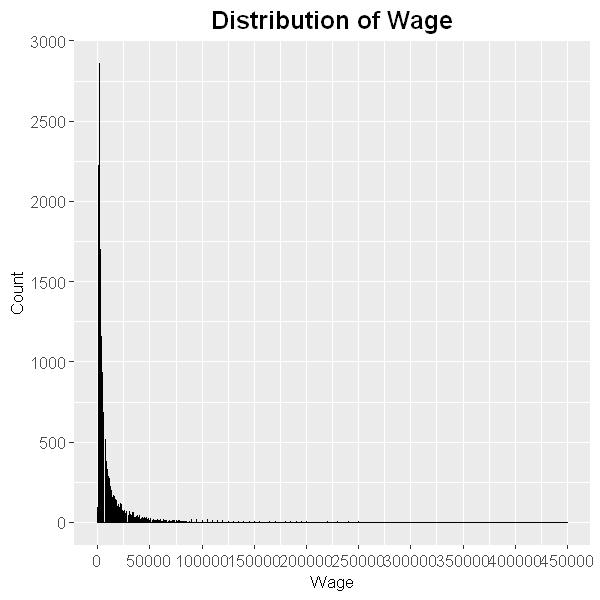

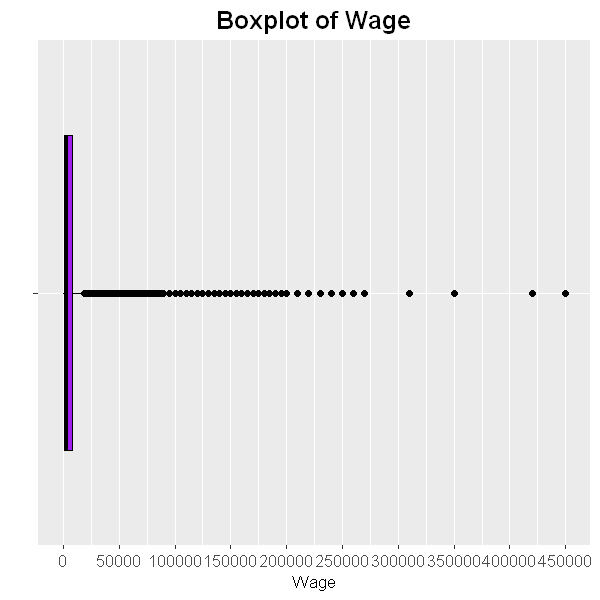

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5) 
#Create the histogram
histogram <- ggplot(wageskill, aes(x = Wage)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Wage", y = "Count", title = "Distribution of Wage") +
  scale_x_continuous(breaks = seq(0, 450000, by = 50000)) +
  scale_y_continuous(breaks = seq(0, 3000, by = 500)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 10),
        axis.text = element_text(size = 10)) 

#Create the boxplot
boxplot <- ggplot(wageskill, aes(x = "", y = Wage)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Wage", title = "Boxplot of Wage") +
  scale_y_continuous(breaks = seq(0, 450000, by = 50000)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 10),
        axis.text = element_text(size = 10)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

As we can see from the plot above, the distribution of Wage is very, very skewed. Thus, we have to perform log transformation to the data. 

In [12]:
#Check for zero & null values
colSums(wageskill==0)
colSums(is.na(wageskill))

Wage              Skill.Moves International.Reputation 
                      92                        0                        0 
                   Value 
                     104

Wage              Skill.Moves International.Reputation 
                       0                        0                        0 
                   Value 
                       0

There are 92 zero values in Wage and 104 zero values in Value. Hence, we have to remove the zero values to perform log transformation.

In [23]:
#Remove data with Value == 0
zero_rm_wageskill <- wageskill[wageskill$Value != 0, ]
dim(wageskill)
dim(zero_rm_wageskill)
colSums(zero_rm_wageskill==0)

[1] 18539     4

[1] 18435     4

Wage              Skill.Moves International.Reputation 
                       0                        0                        0 
                   Value 
                       0

In [24]:
#Log transformation of the Wage
zero_rm_wageskill$Wage_log <- log(zero_rm_wageskill$Wage)
summary(zero_rm_wageskill$Wage_log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.215   6.908   8.006   8.057   8.987  13.017 

List of 3
 $ axis.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : chr "bold"
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : num 0.5
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight

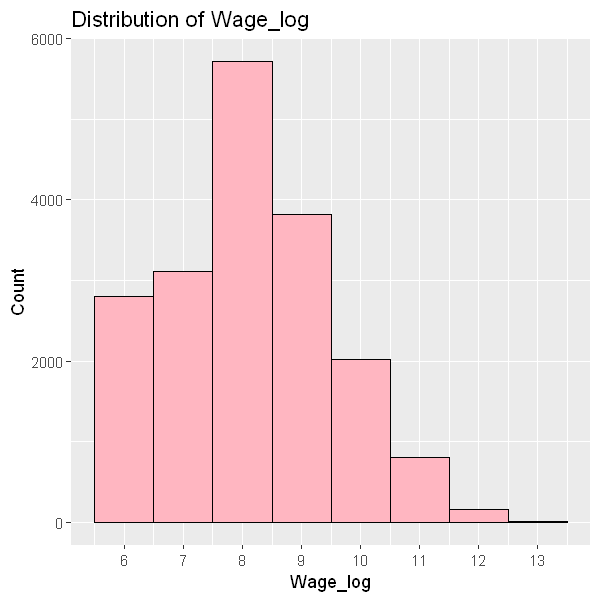

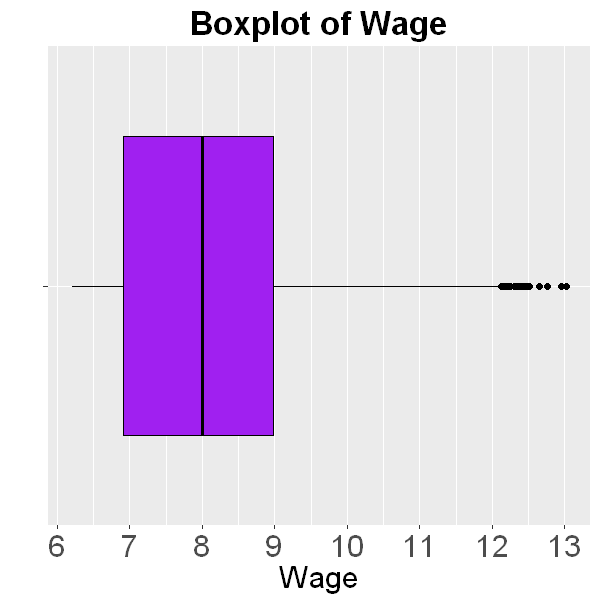

In [27]:
#Create the histogram
histogram <- ggplot(zero_rm_wageskill, aes(x = Wage_log)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Wage_log", y = "Count", title = "Distribution of Wage_log") +
  scale_x_continuous(breaks = seq(5, 15, by = 1))

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(zero_rm_wageskill, aes(x = "", y = Wage_log)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Wage_log", title = "Boxplot of Wage") +
  scale_y_continuous(breaks = seq(5, 15, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

Now the Distribution of Wage is at least more visible and clearer.

List of 3
 $ axis.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : chr "bold"
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : num 0.5
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight

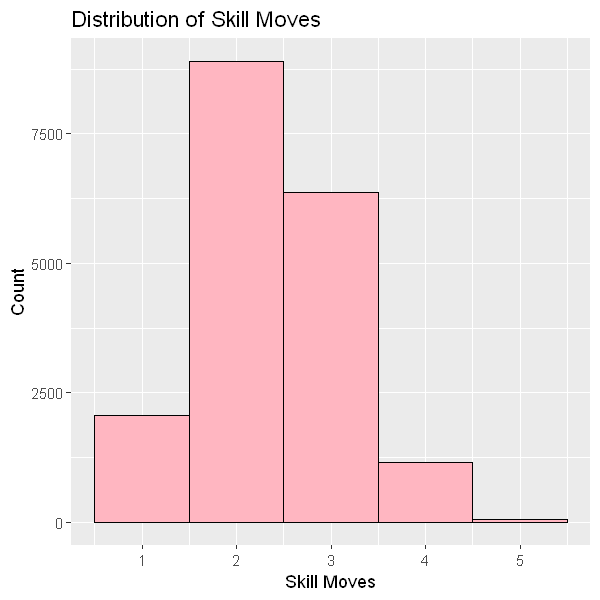

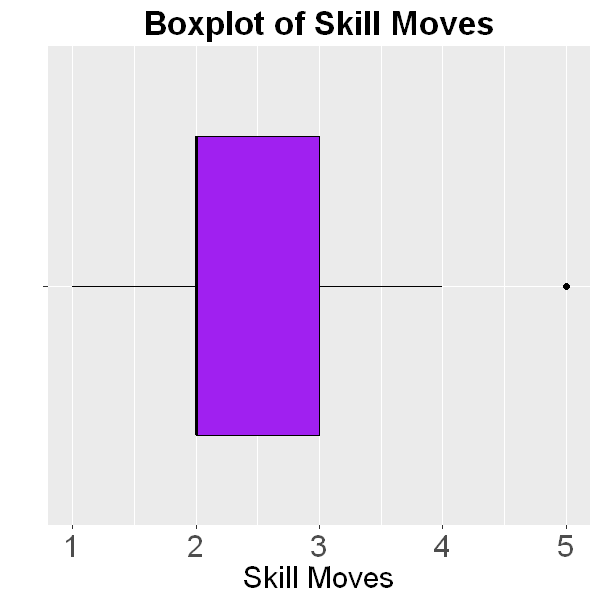

In [38]:
#Create the histogram
histogram <- ggplot(wageskill, aes(x = Skill.Moves)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Skill Moves", y = "Count", title = "Distribution of Skill Moves") +
  scale_x_continuous(breaks = seq(0, 5, by = 1))

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(wageskill, aes(x = "", y = Skill.Moves)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Skill Moves", title = "Boxplot of Skill Moves") +
  scale_y_continuous(breaks = seq(1, 5, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

We can see that the distribution of SKill Moves is slightly right skewed.

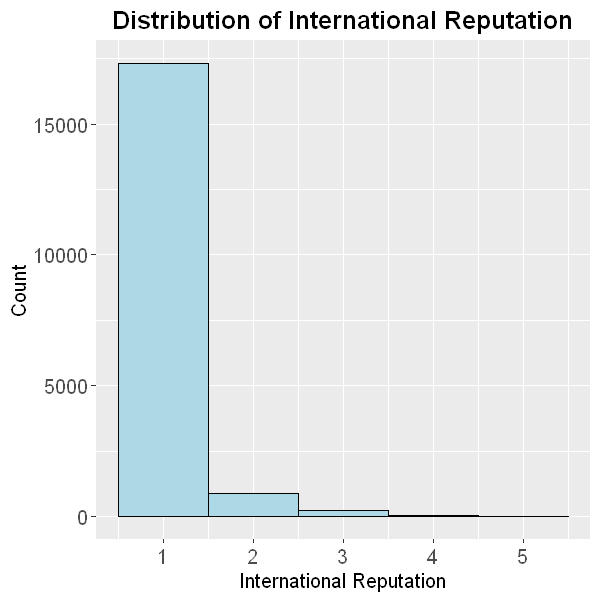

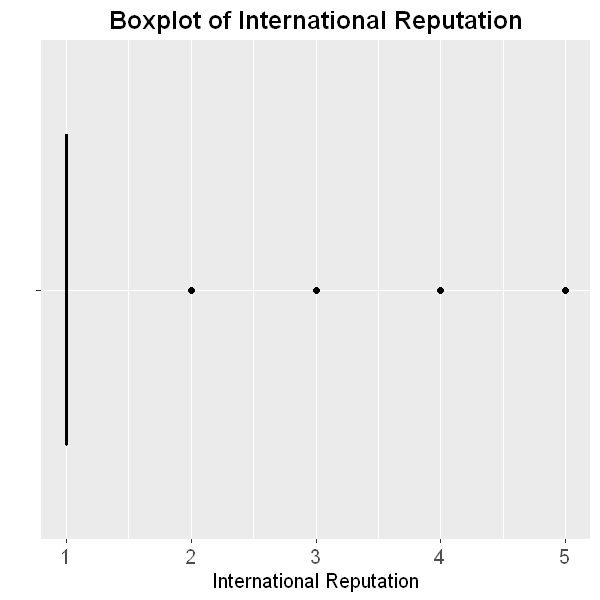

In [44]:
#Create the histogram
histogram <- ggplot(wageskill, aes(x = International.Reputation)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "International Reputation", y = "Count", title = "Distribution of International Reputation") +
  scale_x_continuous(breaks = seq(0, 5, by = 1)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12)) 

#Create the boxplot
boxplot <- ggplot(wageskill, aes(x = "", y = International.Reputation)) +
  geom_boxplot(color = "black", fill = "lightgreen") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "International Reputation", title = "Boxplot of International Reputation") +
  scale_y_continuous(breaks = seq(0, 5, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

The distribution of International Reputation is very right skewed.

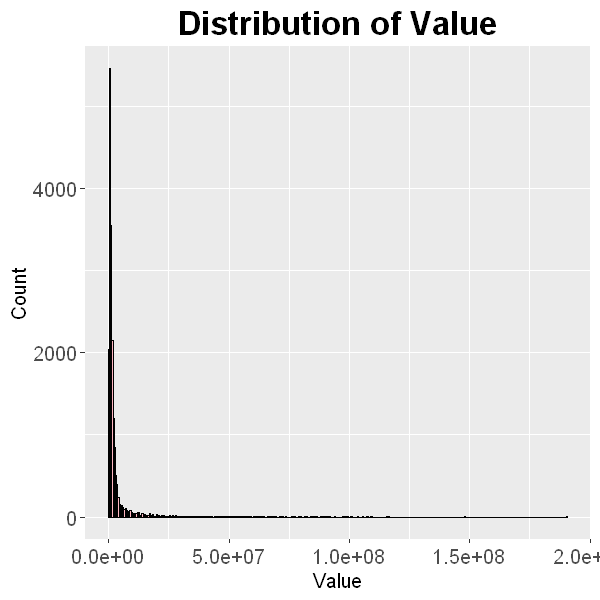

In [50]:
#Create the histogram
histogram <- ggplot(wageskill, aes(x = Value)) + 
  geom_histogram(binwidth = 500000, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Value", y = "Count", title = "Distribution of Value") +
#   scale_x_continuous(breaks = seq(45, 95, by = 5)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12)) 

#Create the boxplot
# boxplot <- ggplot(data, aes(x = "", y = Value)) +
#   geom_boxplot(color = "black", fill = "lightgreen") +

#   # Add axis labels and adjust tick marks
#   labs(x = "", y = "Value", title = "Boxplot of Value") +
#   scale_y_continuous(breaks = seq(45, 95, by = 5)) +

#   # Adjust the size of the plot and labels
#   theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
#         axis.title = element_text(size = 18),
#         axis.text = element_text(size = 18)) +
#   coord_flip() 

plot(histogram)
# plot(boxplot)

The value distribution is also very right skewed. Since we have already removed the zero values for Value previously, we now will perform log transformation for Value.

In [53]:
dim(zero_rm_wageskill)
colSums(zero_rm_wageskill == 0)

[1] 18435     5

Wage              Skill.Moves International.Reputation 
                       0                        0                        0 
                   Value                 Wage_log 
                       0                        0

In [54]:
#Log transformation of the Value
zero_rm_wageskill$Value_log <- log(zero_rm_wageskill$Value)
summary(zero_rm_wageskill$Value_log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.105  13.122  13.816  13.894  14.509  19.065 

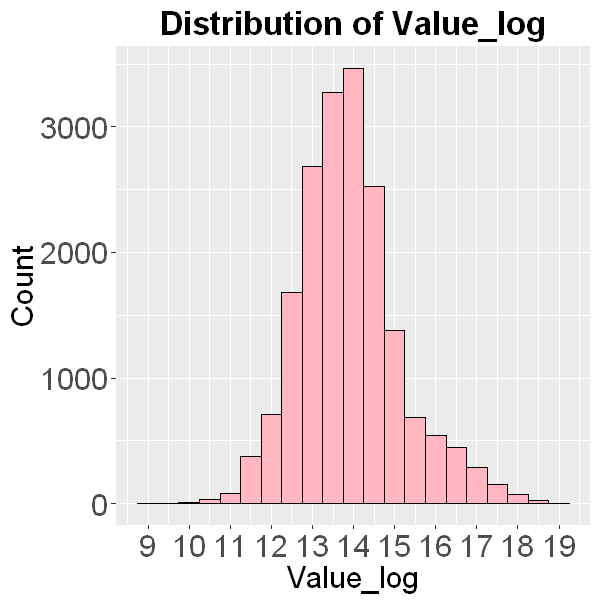

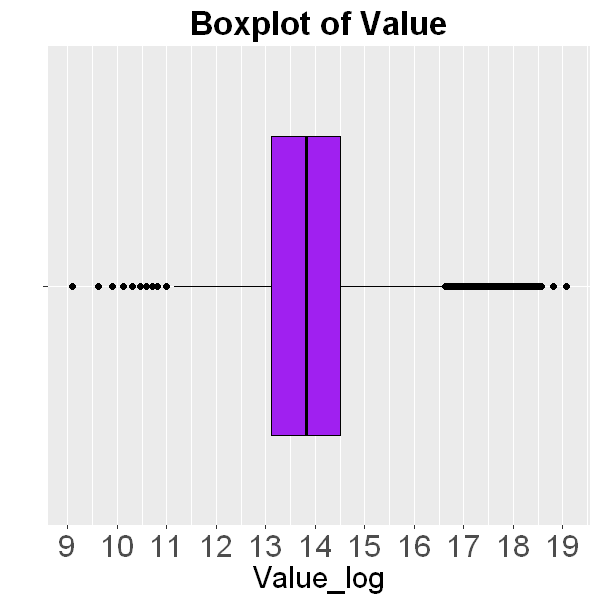

In [55]:
#Create the histogram
histogram <- ggplot(zero_rm_wageskill, aes(x = Value_log)) + 
  geom_histogram(binwidth = 0.5, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Value_log", y = "Count", title = "Distribution of Value_log") +
  scale_x_continuous(breaks = seq(8, 20, by = 1)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

# Create the boxplot
boxplot <- ggplot(zero_rm_wageskill, aes(x = "", y = Value_log)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Value_log", title = "Boxplot of Value") +
  scale_y_continuous(breaks = seq(8, 20, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

The distribution of Value is very close to normal distribution.

In [58]:
library(treemap)
library(treemapify)

ERROR: Error in library(treemap): there is no package called 'treemap'


In [60]:
#Select numerical column
num_cols <- select_if(zero_rm_wageskill, is.numeric)
colnames(num_cols)

[1] "Wage"                     "Skill.Moves"             
[3] "International.Reputation" "Value"                   
[5] "Wage_log"                 "Value_log"

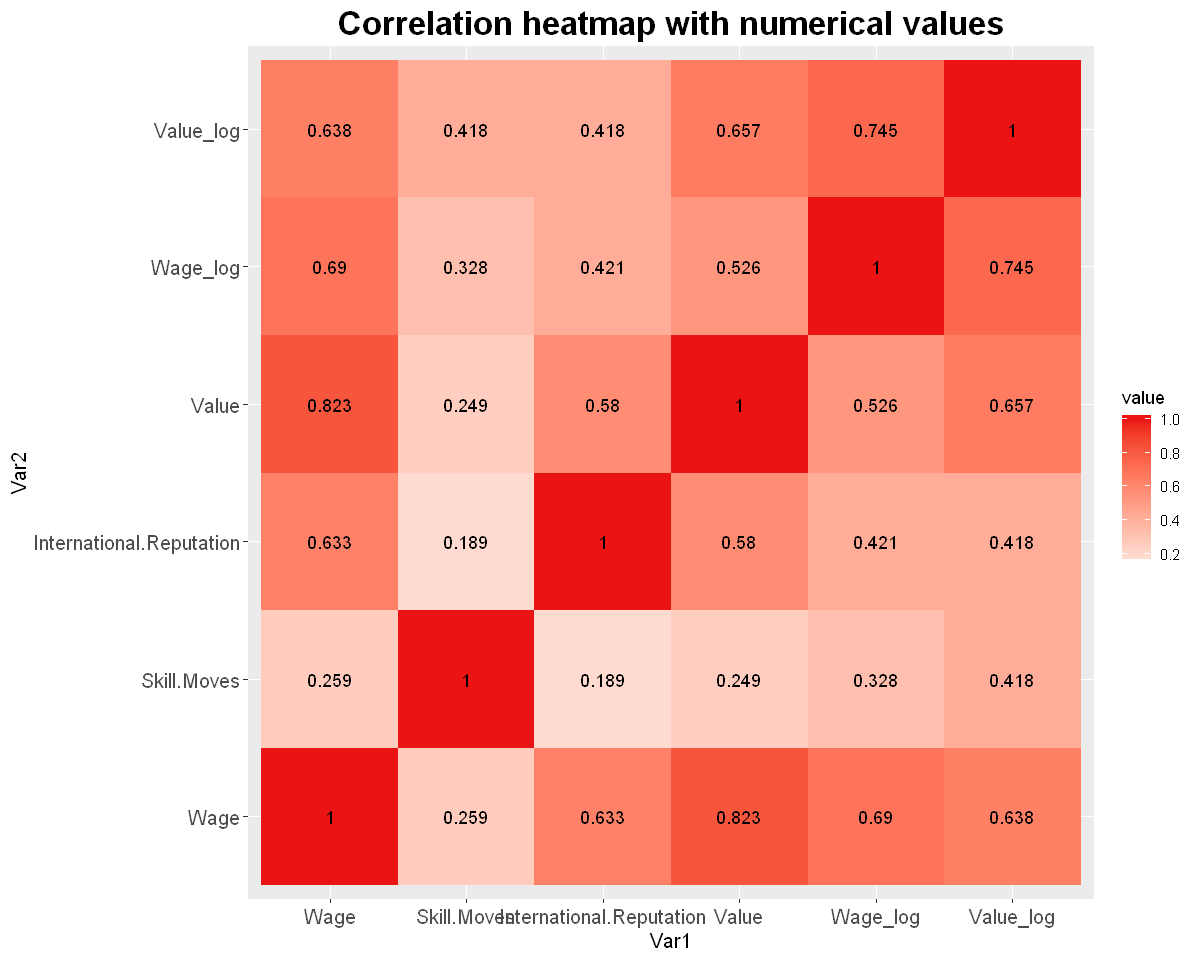

In [64]:
#Correlation of each numerical values
corr_mat <- cor(num_cols)
melted_corr_mat <- melt(corr_mat)

# Create the heatmap
heatmap <- ggplot(data = melted_corr_mat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 3))) +
  scale_fill_gradient2(low = "#0066CC", mid = "white", high = "#EB1313", midpoint = 0) +
  labs(title = "Correlation heatmap with numerical values") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12))

plot(heatmap)

Among the variables, there are a few very interesting observations. 
Value_log and Wage_log is quite highly correlated (r = 0.745)
Value_log and International Reputation has a fairly high positive correlation (r = 0.418) and the correlation is the same as Skill Moves.
Wage_log and International Reputation also has a fairly high positive correlation (r = 0.421) that is higher than that of Wage_log and Skill Moves (r = 0.328)
International Reputation and Skill Moves have relatively low positive correlation (r = 0.189)